In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../')
sys.path.append('../../')

In [139]:
sys.path.append('/data/jls/cyanide/')
from cannon_ages import *
model = tc.CannonModel.read(
    '/data/jls/GaiaDR2/spectro/lamost_cannon/lamost.cannon')

In [97]:
rave = tc.CannonModel.read('/data/jls/cyanide/outputs/aspcap_calibrated_candn_h_model_age_phot_output.pkl')

(3850.0, 5800.0)

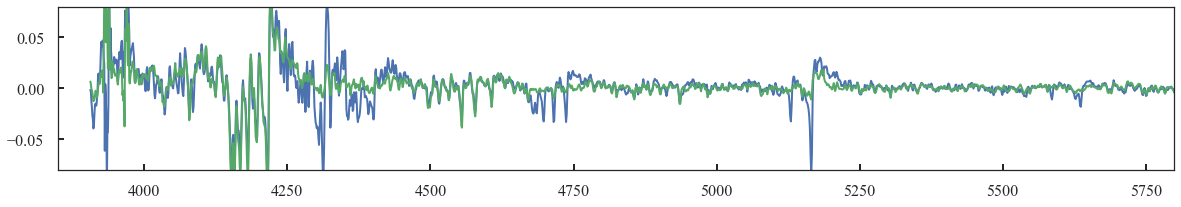

In [143]:
plt.figure(figsize=[20.,3.])
# plt.plot(model.dispersion,(model.theta.T[0]-1.)*0.4)
plt.plot(model.dispersion,model.theta.T[5])
# plt.plot(rave.dispersion,rave.theta.T[5])
plt.plot(model.dispersion,model.theta.T[6])
# plt.plot(model.dispersion,model.theta.T[7])
# plt.plot(rave.dispersion,rave.theta.T[6])
# plt.plot(model.dispersion,model.theta.T[5]-model.theta.T[6])
# plt.plot(rave.dispersion,rave.theta.T[5]-rave.theta.T[6])
plt.ylim(-0.08,0.08)
# plt.ylim(-0.03,0.03)
plt.xlim(3850.,5800.)
# plt.xlim(3850.,9000.)

(-0.01, 0.01)

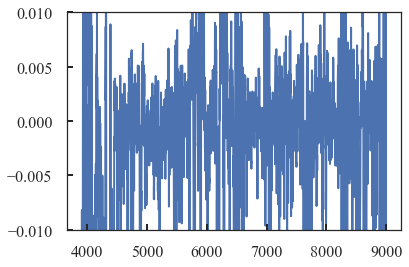

In [145]:
plt.plot(model.dispersion, model.theta.T[7])
plt.ylim(-0.01,0.01)
# plt.xlim(8500.,)

In [146]:
from astropy.table import Table
fldr = '/data/jls/GaiaDR2/spectro/lamost_cannon/'
labelled_set = pd.read_hdf(fldr + 'training_data_pruned.hdf5')
# [['TEFF','LOGG','M_H','ALPHA_M','C_M','N_M','AK']].astype(np.float64)
# labelled_set = Table.from_pandas(labelled_set)
test = np.load(fldr + 'test.npy')
cov = np.load(fldr + 'test_cov.npy')
flux = np.load(fldr + 'training_flux_pruned.npy')
ivar = np.load(fldr + 'training_ivar_pruned.npy')

In [147]:
snr = np.nanmedian(np.sqrt(ivar)*flux, axis=1)

In [148]:
len(snr)

19882

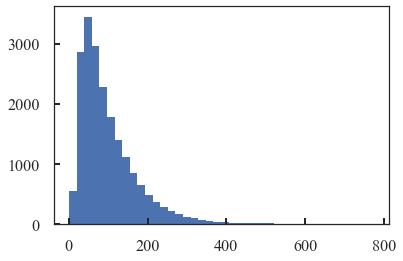

In [149]:
plt.hist(snr,bins=40);

In [150]:
from matplotlib.colors import LogNorm

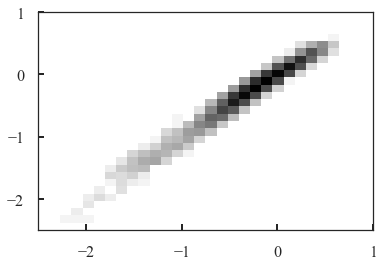

In [151]:
plt.hist2d(test.T[2],
           labelled_set.M_H,
           bins=30,range=[[-2.5,1.],[-2.5,1.]],norm=LogNorm());

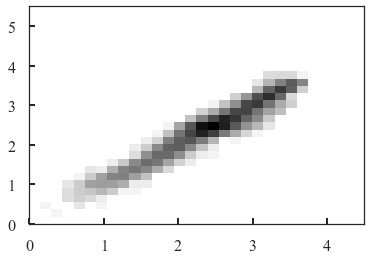

In [152]:
plt.hist2d(test.T[1],labelled_set['LOGG'],bins=30,range=[[0.,4.5],[0.,5.5]],norm=LogNorm());

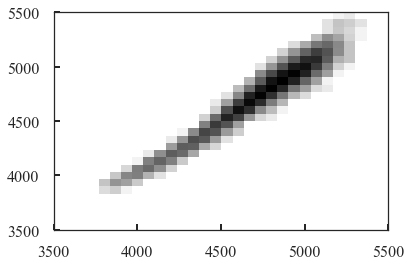

In [153]:
plt.hist2d(test.T[0],labelled_set['TEFF'],bins=30,range=[[3500.,5500.],[3500.,5500.]],norm=LogNorm());

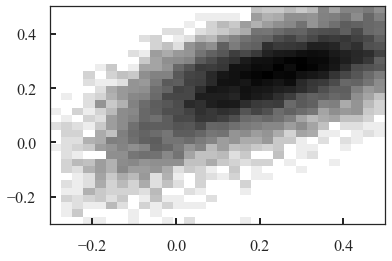

In [154]:
plt.hist2d(test.T[5],labelled_set['N_M'],bins=30,range=[[-0.3,0.5],[-0.3,0.5]],norm=LogNorm());

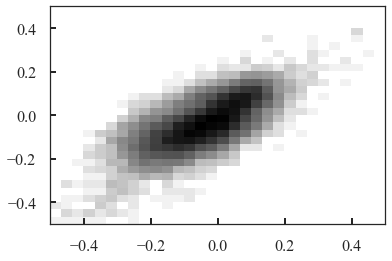

In [155]:
plt.hist2d(test.T[4],labelled_set['C_M'],bins=30,range=[[-0.5,0.5],[-0.5,0.5]],norm=LogNorm());

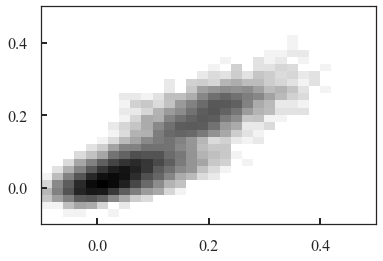

In [156]:
plt.hist2d(test.T[3],labelled_set['ALPHA_M'],bins=30,range=[[-0.1,0.5],[-0.1,0.5]],norm=LogNorm());

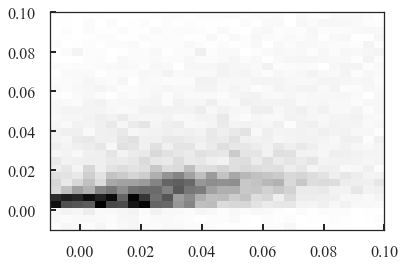

In [158]:
plt.hist2d(test.T[6],labelled_set['AK'],bins=30,range=[[-0.01,0.1],[-0.01,0.1]]);

In [233]:
m = pd.read_hdf('/data/jls/GaiaDR2/spectro/lamost_cannon/LAMOST_results.hdf5')

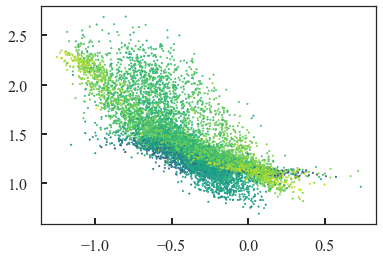

In [234]:
plt.scatter(m.C_M-m.N_M,m.mass,c=m.LOGG,cmap=plt.cm.viridis,s=2,vmin=0.,vmax=4.)

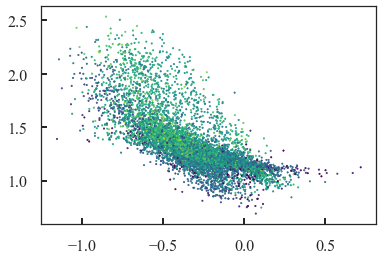

In [251]:
plt.scatter((m.C_M-m.N_M)[m.r_chi_sq<1.],
            m.mass[m.r_chi_sq<1.],
            c=m.M_H[m.r_chi_sq<1.],cmap=plt.cm.viridis,s=2,vmin=-1.,vmax=0.7)

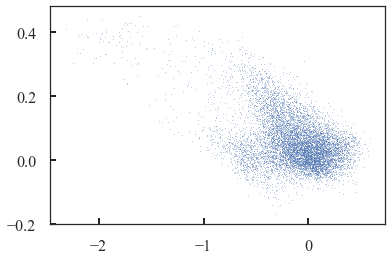

In [252]:
plt.plot(m.M_H[m.r_chi_sq<3.],m.ALPHA_M[m.r_chi_sq<3.],'.',ms=1)

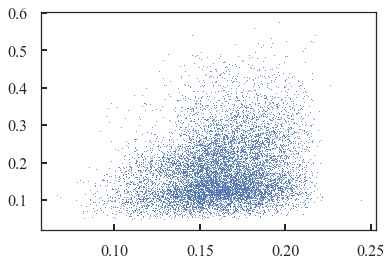

In [243]:
plt.plot(np.sqrt(m.C_M_ERR_SNR**2+m.N_M_ERR_SNR**2),m.mass_error,'.',ms=2)

(array([  59., 3185., 3567., 1237.,  539.,  291.,  188.,  122.,  105.,
          75.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

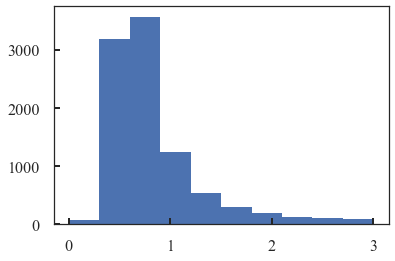

In [227]:
plt.hist(m.r_chi_sq,range=[0.,3.])

<Container object of 3 artists>

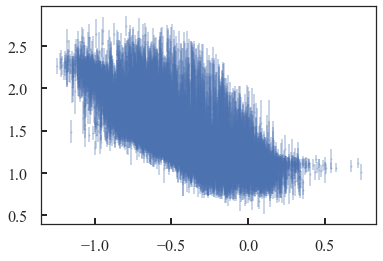

In [223]:
plt.errorbar(m.C_M-m.N_M,m.mass,m.mass_error,fmt='o',ms=2, alpha=0.3)

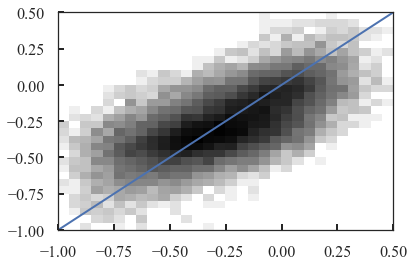

In [161]:
xx = np.linspace(-1.,0.5)
plt.hist2d(test.T[4]-test.T[5],labelled_set['C_M']-labelled_set['N_M'],
           bins=30,range=[[-1.,0.5],[-1.,0.5]],
           norm=LogNorm()
          );
plt.plot(xx,xx)

In [162]:
from plotting_general import running_median

[ 2.33069360e+02  3.23737698e-01 -3.45668541e-05]
[4.34346119e-01 2.84945548e-01 2.51752063e-06]
[0.79228514 0.52887269 2.11444907]
[ 0.09305232  0.19985991 -0.00039539]
[2.94660978 0.64804297 4.71707655]
[11.68214502  0.74178743  7.54575714]
[0.09655162 0.16942847 0.000784  ]


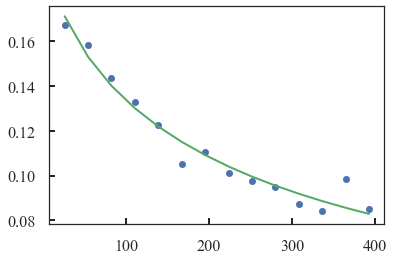

In [239]:
from scipy.optimize import leastsq
for i,n in enumerate(['TEFF','LOGG','M_H','ALPHA_M','C_M','N_M','AK']):
    r = running_median(snr, test.T[i]-labelled_set[n])
    std = .5*(r[3]-r[2])
    bin_centres = r[0]
    def fn(p):
        return std - p[0] / (np.power(bin_centres,p[1])+p[2]**2)
    p = leastsq(fn, [1.,.5,.2])[0]
    print p
#     plt.plot(r[0],.5*(r[3]-r[2])/(.5*(r[3]-r[2]))[0],'.')
#     plt.plot(r[0],p[0]/(np.power(r[0],p[1])+p[2]**2)/(p[0]/(np.power(r[0][0],p[1])+p[2]**2)))
    if i==5:
        plt.plot(r[0],.5*(r[3]-r[2]),'.')
        plt.plot(r[0],p[0]/(np.power(r[0],p[1])+p[2]**2))